In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import yaml
from collections import defaultdict
from nltk.corpus import stopwords
import nltk
import numpy as np
%matplotlib inline

with open("config.yaml","r") as f:
    config = yaml.safe_load(f)
stopwords = set(stopwords.words('english'))

In [97]:
train = pd.read_csv(config["data"]['train']).fillna(0)
test = pd.read_csv(config["data"]['test']).fillna(0)

In [11]:
train.sample(n=5)

,id,keyword,location,text,target
5077,7236,natural%20disaster,NaN,Patriot Survival Guide: Do you know how surviv...,1
5188,7407,obliterated,NaN,@breakingnewslh @bree_mars watch cnn's the sev...,1
5848,8356,ruin,Garrett,like why on earth would you want anybody to be...,0
6399,9145,suicide%20bomber,NaN,ISIS claims responsibility for Saudi mosque su...,1
136,196,airplane%20accident,"19.600858, -99.047821",Experts in France begin examining airplane deb...,1


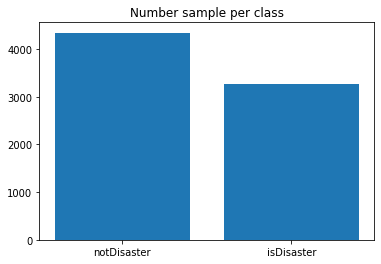

In [96]:
n_train = len(train.index)
x = train.target.map({1: "isDisaster", 0: "notDisaster"}).value_counts()

plt.bar(x.index, x)
plt.title("Number sample per class")
plt.show()


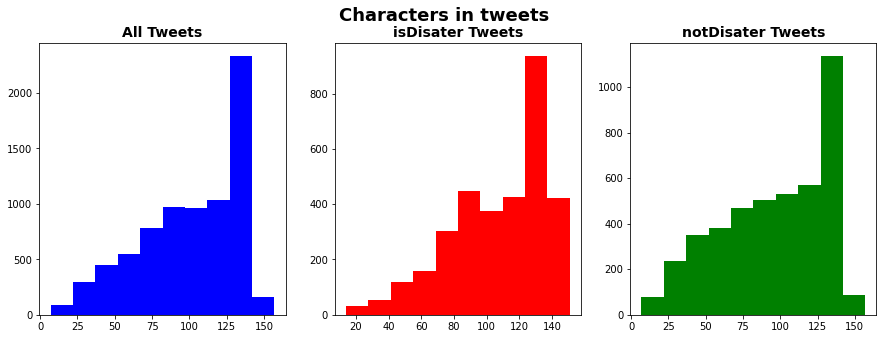

In [44]:
all_character_len = train['text'].str.len()
positve_character_len = train.query("target == 1")['text'].str.len()
negative_character = train.query("target == 0")['text'].str.len()

fig, (sub1, sub2, sub3) = plt.subplots(1,3, figsize=(15,5))

sub1.hist(all_character_len, color="blue")
sub1.set_title('All Tweets',fontweight='bold', fontsize=14)

sub2.hist(positve_character_len, color="red")
sub2.set_title('isDisater Tweets',fontweight='bold', fontsize=14)

sub3.hist(negative_character, color='green')
sub3.set_title('notDisater Tweets',fontweight='bold', fontsize=14)

fig.suptitle("Characters in tweets", fontweight='bold', fontsize=18)
plt.show()

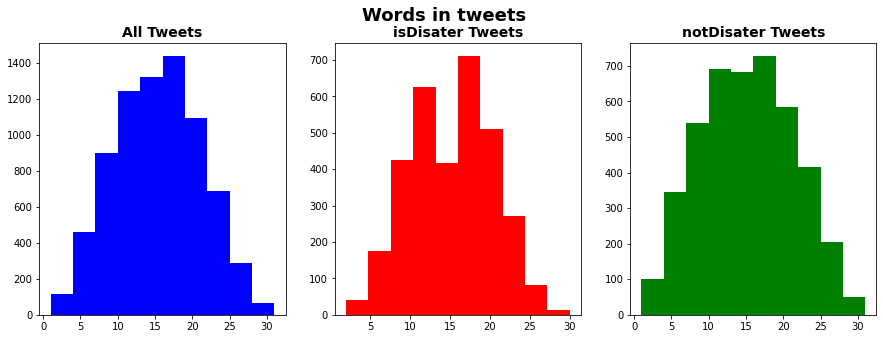

In [45]:
all_word_len = train['text'].str.split().map(lambda x: len(x))
positve_word_len = train.query("target == 1")['text'].str.split().map(lambda x: len(x))
negative_word_len = train.query("target == 0")['text'].str.split().map(lambda x: len(x))

fig, (sub1, sub2, sub3) = plt.subplots(1,3, figsize=(15,5))

sub1.hist(all_word_len, color="blue")
sub1.set_title('All Tweets',fontweight='bold', fontsize=14)

sub2.hist(positve_word_len, color="red")
sub2.set_title('isDisater Tweets',fontweight='bold', fontsize=14)

sub3.hist(negative_word_len, color='green')
sub3.set_title('notDisater Tweets',fontweight='bold', fontsize=14)

fig.suptitle("Words in tweets", fontweight='bold', fontsize=18)
plt.show()

In [23]:
def create_corpus(data: 'pd.DataFrame', target = None):
    corpus = []
    if target is None:
        for x in data['text'].str.split():
            corpus.extend(x)
    else:
        for x in data[data['target'] == target]['text'].str.split():
            corpus.extend(x)
    
    return corpus

def word_filter(corpus,stopwords,filter = True, top=10):
    dic = defaultdict(int)
    for word in corpus:
        if filter is not None and word in filter:
            dic[word] +=1
        else:
            dic[word] +=1
    top = sorted(dic.items(), key = lambda x:x[1], reverse=True)[:top]
    x,y = zip(*top)
    return x,y

In [15]:
print("NLTK stopwords have {} words".format(len(stopwords)))
print(stopwords)

NLTK stopwords have 179 words
{'it', 'been', "you'd", "you're", 'below', 'the', 'all', 's', 'don', 'each', 'weren', 'they', "hadn't", "won't", 'wouldn', "shan't", 'just', 'here', 'against', 'up', 'be', 'not', 'is', 'hers', "didn't", 'its', 'why', 'those', 'down', 'yourselves', 'where', "doesn't", 'these', 'there', 'if', 'only', 'because', 'she', 'most', 'wasn', 'than', 'ma', 'our', 'we', 'himself', "mustn't", 'out', "should've", 'which', 'o', 'at', 'other', 'from', 'has', 'now', 'until', 'have', 'nor', 'this', "aren't", 'on', 'hadn', "mightn't", 'm', 'ourselves', 'hasn', 'as', "she's", 'over', "you'll", 'doesn', 'll', 'in', 'are', 'then', 'during', 'having', 'a', "you've", 'any', 'y', 'that', 'both', 'i', "don't", 'will', 'so', 'should', 't', 'but', 'who', 'ours', 'about', 'haven', "hasn't", "weren't", 'no', 'and', "that'll", 'theirs', "it's", 'did', "wasn't", 'yourself', 'above', 'before', 'my', "shouldn't", 'his', 'for', 'how', 'her', 'needn', 'with', 'between', 'again', 'ain', 'you'

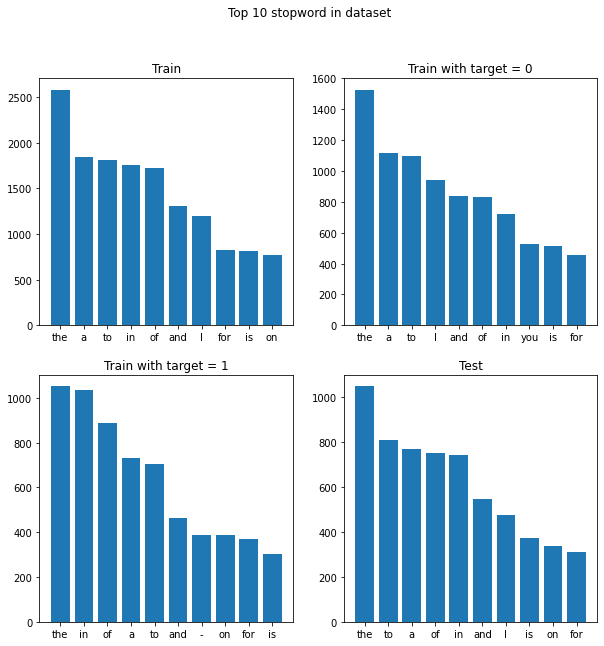

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
top = 10

fig.suptitle("Top {} stopword in dataset".format(top))

corpus = create_corpus(train)
x,y = word_filter(corpus, stopwords, top)
axs[0,0].bar(x,y)
axs[0,0].set_title("Train")

corpus = create_corpus(train, 0)
x,y = word_filter(corpus, stopwords, top)
axs[0,1].bar(x,y)
axs[0,1].set_title("Train with target = 0")

corpus = create_corpus(train, 1)
x,y = word_filter(corpus, stopwords, top)
axs[1,0].bar(x,y)
axs[1,0].set_title("Train with target = 1")

corpus = create_corpus(test)
x,y = word_filter(corpus, stopwords, top)
axs[1,1].bar(x,y)
axs[1,1].set_title("Test")

plt.show()

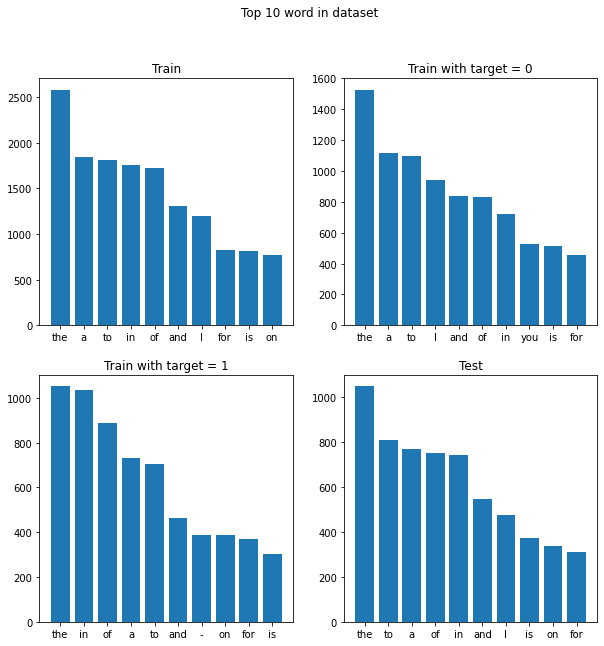

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
top = 10

fig.suptitle("Top {} word in dataset".format(top))

corpus = create_corpus(train)
x,y = word_filter(corpus, filter = None, top = top)
axs[0,0].bar(x,y)
axs[0,0].set_title("Train")

corpus = create_corpus(train, 0)
x,y = word_filter(corpus, filter = None, top = top)
axs[0,1].bar(x,y)
axs[0,1].set_title("Train with target = 0")

corpus = create_corpus(train, 1)
x,y = word_filter(corpus, filter = None, top = top)
axs[1,0].bar(x,y)
axs[1,0].set_title("Train with target = 1")

corpus = create_corpus(test)
x,y = word_filter(corpus, filter = None, top = top)
axs[1,1].bar(x,y)
axs[1,1].set_title("Test")

plt.show()

In [98]:
keyword = train.keyword.value_counts().index
print("Number keyword: {}".format(len(keyword)))
keyword_positive = train[train["target"] == 1].keyword.value_counts()
keyword_negative = train[train["target"] == 0].keyword.value_counts()
print("Number keyword of isDisaster tweet: {}".format(len(keyword_positive)))
print("Number keyword of notDisaster tweet: {}".format(len(keyword_negative)))

positive_exclusive = set(keyword_positive.index) - set(keyword_negative.index)
print("Keyword only in isDisaster tweet:", positive_exclusive)
negative_exclusive = set(keyword_negative.index)- set(keyword_positive.index)
print("Keyword only in notDisaster tweet:", negative_exclusive)



Number keyword: 222
Number keyword of isDisaster tweet: 221
Number keyword of notDisaster tweet: 219
Keyword only in isDisaster tweet: {'wreckage', 'debris', 'derailment'}
Keyword only in notDisaster tweet: {'aftershock'}


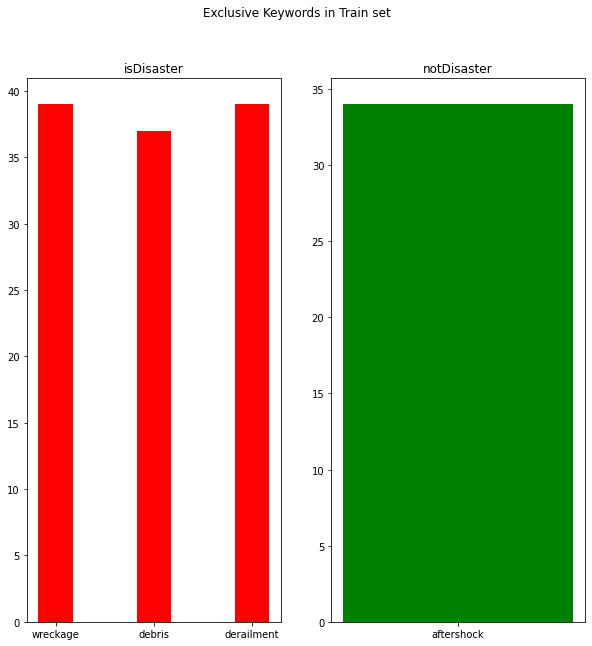

In [99]:
positive_exclusive_count = {key:keyword_positive[key] for key in positive_exclusive}
negative_exclusive_count = {key:keyword_negative[key] for key in negative_exclusive}
fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].bar(positive_exclusive_count.keys(), positive_exclusive_count.values(), width = 0.35, color='red')
axs[0].set_title("isDisaster")

axs[1].bar(negative_exclusive_count.keys(), negative_exclusive_count.values(), width = 0.35, color='green')
axs[1].set_title("notDisaster")
plt.suptitle("Exclusive Keywords in Train set")
plt.show()

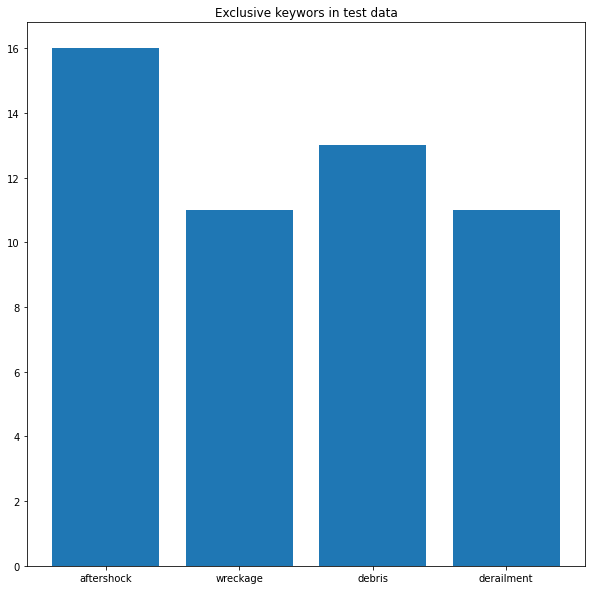

Total:  51


In [105]:
keyword_test = test['keyword'].value_counts()
exclusive_keyword = positive_exclusive.union(negative_exclusive)
exclusive_keyword_test = {key : keyword_test[key] for key in exclusive_keyword}
plt.figure(figsize=(10,10))
plt.bar(exclusive_keyword_test.keys(), exclusive_keyword_test.values())
plt.title("Exclusive keywors in test data")
plt.show()
print("Total: ", sum(exclusive_keyword_test.values()))


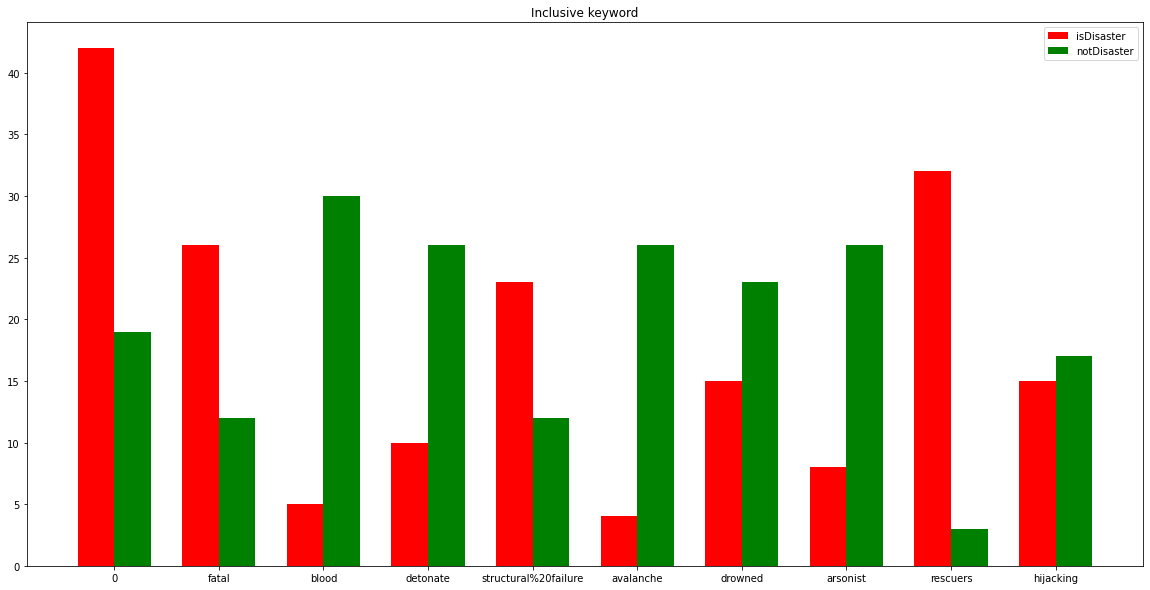

In [102]:
inclusive_keyword = set(keyword_positive.index).intersection(set(keyword_negative.index))

positive_inclusive_keyword_count = {key :keyword_positive[key] for key in inclusive_keyword }
negative_inclusive_keyword_count = {key :keyword_negative[key] for key in inclusive_keyword }

width = 0.35
n = np.arange(10)
plot_keyword = list(inclusive_keyword)[:10]
plt.figure(figsize=(20,10))
plt.bar(n, [positive_inclusive_keyword_count[i] for i in plot_keyword],width=0.35, color="red")
plt.bar(n + width, [negative_inclusive_keyword_count[i] for i in plot_keyword], width=0.35, color = "green")
plt.xticks(n + width/2, plot_keyword)
plt.legend(('isDisaster', 'notDisaster'))
plt.title("Inclusive keyword")
plt.show()

In [109]:
location = train.location.value_counts().index
print("Number location: {}".format(len(location)))
location_positive = train[train["target"] == 1].location.value_counts()
location_negative = train[train["target"] == 0].location.value_counts()
print("Number location of isDisaster tweet: {}".format(len(location_positive)))
print("Number location of notDisaster tweet: {}".format(len(location_negative)))

location_positive_exclusive = set(location_positive.index) - set(location_negative.index)
print("location only in isDisaster tweet:", len(positive_exclusive))
location_negative_exclusive = set(location_negative.index)- set(location_positive.index)
print("location only in notDisaster tweet:", len(negative_exclusive))

Number location: 3342
Number location of isDisaster tweet: 1514
Number location of notDisaster tweet: 2143
location only in isDisaster tweet: 1199
location only in notDisaster tweet: 1828


TypeError: 'dict_keys' object is not subscriptable

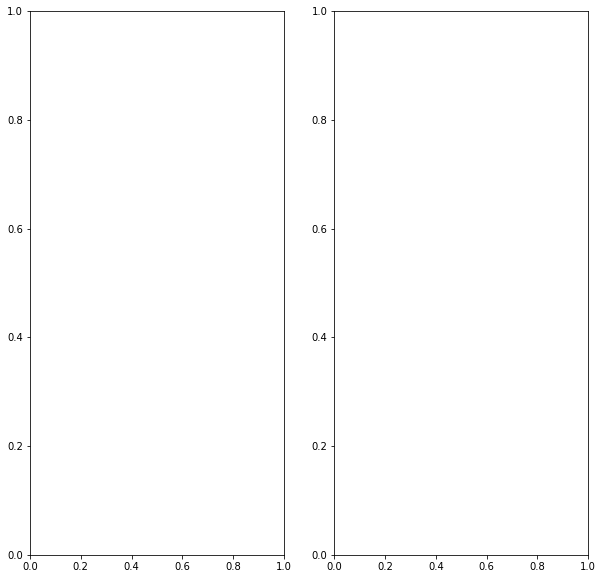